In [2]:
import sys
sys.path.append('../../../src')
from helpers import *
import scipy.stats as st
%matplotlib widget

if not os.path.exists('Figs'):
    os.mkdir('Figs')

In [3]:
path_gcn4 = [data_path + '/Imaging/Free GCN4/210826_nwg383_tom4,5,60,500/', 
            data_path + '/Imaging/Free GCN4/210826_nwg384_tom4,5,60,500/']
paths_gcn4 = direcslist(path_gcn4, 0)

path_ctrl = data_path + '/Imaging/Free mNG/210804_nwg378_tom4,5,60,500/'
paths_ctrl = direcslist(path_ctrl, 0)

### Images gcn4 vs control

<IPython.core.display.Javascript object>


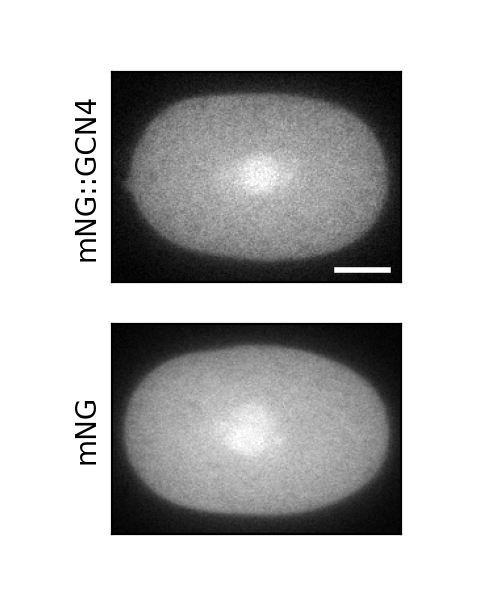

In [5]:
def func(path, ax, scale_bar=False):
    img = load_image(path + '/af_corrected.tif')
    roi = np.loadtxt(path + '/ROI.txt')
    rotated = rotated_embryo(img, roi, 220, 160, 3)
    ax.imshow(rotated, cmap='gray', vmin=0, vmax=np.percentile(rotated, 99.9))
    ax.set_xticks([])
    ax.set_yticks([])
    
    if scale_bar:
        px = 0.255 # pixel size
        bar_length = 10  # microns
        bar_pixels = bar_length / px
        y = rotated.shape[0] - 10
        ax.plot([rotated.shape[1]-10-bar_pixels, rotated.shape[1]-10], [y, y], color='w', linewidth=2)
    
fig, ax = plt.subplots(2, 1)
func(paths_gcn4[2], ax[0], scale_bar=True)
func(paths_ctrl[0], ax[1])
ax[0].set_ylabel('mNG::GCN4', fontsize=10)
ax[1].set_ylabel('mNG', fontsize=10)
fig.set_size_inches(2.5, 3)
fig.savefig('Figs/imgs_fragment.png', dpi=600, transparent=True)